In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.io import fits as pf
from astropy.io import ascii
import random
from astropy.table import Table, Column

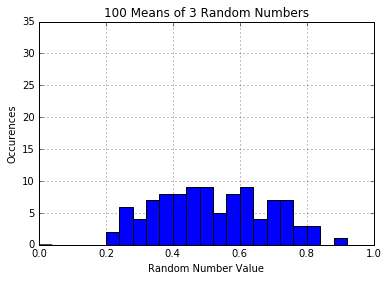

In [23]:
allmeans = []

for i in range(100):
    randos = []
    for i in range(3):
        xx = random.random()
        randos.append(xx)

    mean = np.mean(randos)
    allmeans.append(mean)


x, hist, bins = plt.hist(allmeans, bins = 25, range = (0.0,1.0))
plt.axis([0.0,1.0,0.,35.])
plt.title('100 Means of 3 Random Numbers')
plt.xlabel('Random Number Value')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

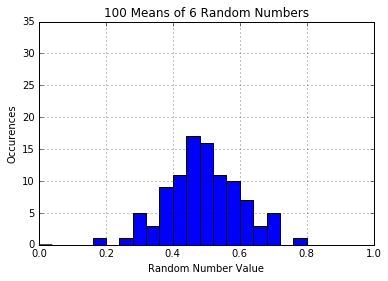

In [24]:
allmeans = []

for i in range(100):
    randos = []
    for i in range(6):
        xx = random.random()
        randos.append(xx)

    mean = np.mean(randos)
    allmeans.append(mean)
    

x, hist, bins = plt.hist(allmeans, bins = 25, range = (0.0,1.0))
plt.axis([0.0,1.0,0.,35.])
plt.title('100 Means of 6 Random Numbers')
plt.xlabel('Random Number Value')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

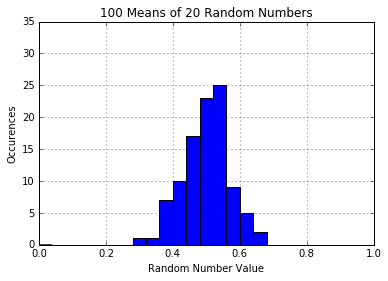

In [26]:
allmeans = []

for i in range(100):
    randos = []
    for i in range(20):
        xx = random.random()
        randos.append(xx)

    mean = np.mean(randos)
    allmeans.append(mean)

x, hist, bins = plt.hist(allmeans, bins = 25, range = (0.0,1.0))
plt.axis([0.0,1.0,0.,35.])
plt.title('100 Means of 20 Random Numbers')
plt.xlabel('Random Number Value')
plt.ylabel('Occurences')
plt.grid(True)
plt.show()

In [29]:
set0 = np.random.poisson(10,10000)
set1 = np.random.poisson(100,10000)
set2 = np.random.poisson(1000,10000)
setlist = [set0,set1,set2]
siglist = np.array([np.sqrt(10),10,np.sqrt(1000)])
meanlist = [10,100,1000]

sig0 = ['% of data within 1sig']
sig1 = ['% of data within 2sig']
sig2 = ['% of data within 3sig']

for i in np.arange(3):
    data = setlist[i]
    k = 0
    l = 0
    m = 0
    mean = meanlist[i]
    sig = siglist[i]
    for x in data:
        if abs(mean-x) <= sig:
            k = k + 1
        if abs(mean-x) <= 2*sig:
            l = l + 1
        if abs(mean-x) <= 3*sig:
            m = m + 1
    
    events = np.array([k,l,m])   
    perc = events/100.
   
    sig0.append(perc[0])
    sig1.append(perc[1])
    sig2.append(perc[2])


data_rows = [sig0,sig1,sig2]
t = Table(rows=data_rows, names=('Mean = ','10', '100', '1000'), meta={'name': 'first table'})
print(t)



set0.sort()
set1.sort()
set2.sort()

lims = np.array([.68,.954,.997])
liml = 5000*(1 - lims)
limr = 5000*(1 + lims)
print ' '

_sig0 = ['mean=10, percent based']
_sig1 = ['mean=100, percent based']
_sig2 = ['mean=1000, percent based']
_siglist = [_sig0,_sig1,_sig2]

_sig00 = ['mean=10, n*sig based']
_sig11 = ['mean=100, n*sig based']
_sig22 = ['mean=1000, n*sig based']
_siglist2 = [_sig00,_sig11,_sig22]

for x,y in enumerate(setlist):
    l1 = y[int(liml[0])]
    r1 = y[int(limr[0])]
    _siglist[x].append('(%i,%i)'%(l1,r1))
    _l1 = meanlist[x] - siglist[x]
    _r1 = meanlist[x] + siglist[x]
    _siglist2[x].append('(%i,%i)'%(_l1,_r1))
    

    l2 = y[int(liml[1])]
    r2 = y[int(limr[1])]
    _siglist[x].append('(%i,%i)'%(l2,r2))
    _l2 = meanlist[x] - 2*siglist[x]
    _r2 = meanlist[x] + 2*siglist[x]
    _siglist2[x].append('(%i,%i)'%(_l2,_r2))
    
    l3 = y[int(liml[2])]
    r3 = y[int(limr[2])]
    _siglist[x].append('(%i,%i)'%(l3,r3))
    _l3 = meanlist[x] - 3*siglist[x]
    _r3 = meanlist[x] + 3*siglist[x]
    _siglist2[x].append('(%i,%i)'%(_l3,_r3))


empty = ['','','','']
data_rows = [_sig0,_sig00,empty,_sig1,_sig11,empty,_sig2,_sig22]
    
t2 = Table(rows=data_rows, names=('n sigma limits','n = 1', 'n = 2', 'n = 3'), meta={'name': 'first table'})
print(t2)

       Mean =           10   100   1000
--------------------- ----- ----- -----
% of data within 1sig 73.42  70.7 68.65
% of data within 2sig 96.32  96.1 95.66
% of data within 3sig 99.62 99.78 99.72
 
     n sigma limits        n = 1      n = 2      n = 3   
------------------------ ---------- ---------- ----------
  mean=10, percent based     (7,13)     (4,17)     (2,21)
    mean=10, n*sig based     (6,13)     (3,16)     (0,19)
                                                         
 mean=100, percent based   (90,110)   (80,120)   (71,130)
   mean=100, n*sig based   (90,110)   (80,120)   (70,130)
                                                         
mean=1000, percent based (969,1031) (939,1064) (908,1095)
  mean=1000, n*sig based (968,1031) (936,1063) (905,1094)
